# AUTOMOBILE INSURANCE  FRAUD

In [1]:
from IPython.display import Image
Image(url= "https://slideplayer.com/8915034/27/images/slide_1.jpg")

# Introduction

### Auto insurance fraud ranges from misrepresenting facts on insurance applications and inflating insurance claims to staging accidents and submitting claim forms for injuries or damage that never occurred, to false reports of stolen vehicles. vehicles.

#### Insurance fraud is a deliberate deception perpetrated against or by an insurance company or agent for the purpose of financial gain
#### Fraud may be committed at different points in the transaction by applicants, policyholders, third-party claimants, or professionals who provide services to claimants. Insurance agents and company employees may also commit insurance fraud. Common frauds include “padding,” or inflating claims; misrepresenting facts on an insurance application; submitting claims for injuries or damage that never occurred; and staging accidents.

#### People who commit insurance fraud include:

##### organized criminals who steal large sums through fraudulent business activities,professionals and technicians who inflate service costs or charge for services not rendered, andordinary people who want to cover their deductible or view filing a claim as an opportunity to make a little money.
##### Some lines of insurance are more vulnerable to fraud than others. Healthcare, workers compensation, and auto insurance are generally considered to be the sectors most affected.

### Details about the dataset:
    
##### It consists of 1000 observations and 40 variables. 
##### Independent variables contain information about fraud_reported. Dependent variable refers to fraud status.

### Features Identification (Inputs):
#### 1) months_as_customer : How many months did the client spend as a customer of the insuring company
#### 2) age : The age of the Insured.
#### 3) policy_number : Insurance companies use insurance policy number to locate a client's account, it is unique. ID like identificator for the client.
#### 4) policy_bind_date : The policy date is the date written on the policy. The day the insurance company agreed to become the client's insurer.
#### 5) policy_state : The American state which the insured is active. -policy_csl
#### 6) -policy_deductable
#### 7) -policy_annual_premium
#### 8) -umbrella_limit
#### 9) -insured_zip
#### 10) -insured_sex
#### 11) -insured_education_level
#### 12) -insured_occupation
#### 13) -insured_hobbies
#### 14) -insured_relationship
#### 15) -capital-gains
#### 16) -capital-loss
#### 17) -incident_date
#### 18) -incident_type
#### 19) -collision_type
#### 20) -incident_severity
#### 21) -authorities_contacted
#### 22) -incident_state
#### 23) -incident_city
#### 24) -incident_location
#### 25) -incident_hour_of_the_day
#### 26)-number_of_vehicles_involved
#### 27) -property_damage
#### 28) -bodily_injuries 
#### 29) -witnesses
#### 30) -police_report_available
#### 31)-total_claim_amount
#### 32) -injury_claim
#### 33) -property_claim
#### 34) -vehicle_claim
#### 35)-auto_make
#### 36) -auto_model
#### 37) -auto_year
#### 38) -policy_csl
#### 39) - fraud_reported

### Project Objective
##### Fraudulent claims are one of the biggest challenges facing any insurance provider. Hence, detecting fraud has not only considerable cost and profit potential for insurers, but also benefits the consumer as it will lead to lower premiums and faster processing of their insurance claims.

##### In this project, I used a publicly available Automotive dataset to construct a machine learning model to predict fraudulent insurance claims

#### Below I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

In [13]:
# IMPORTS LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn import metrics

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


### Loading csv data.

#### Now I am going to upload or read the files/data-sets using pandas. For this I used read_csv method.

In [14]:
df = pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### Then I get the top 5 values. From head function I got Dataset head.

In [15]:
df.shape

(1000, 40)

In [16]:
# pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Well as a first observation I can see that there are no missing values in the above dataset.
#### Acoording to the shape of the dataset it contains 1000 rows & 40 columns.

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(1000, 40)

##### From the above code I can analayze there is no duplicates in this dataset.

In [19]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

##### By finding (df.unique()) it distinguish the difference between continious & categorical columns in this dataset.

In [20]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


#### Above statistics data show that their multiple outliers.
#### There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.
#### Also, number of rows in each column are same, means there are no null values in the data set.
#### Few column in dataset are near to 0 values that need to be replaced by mean and mode.

In [21]:
# dropping _c39
df.drop('_c39',inplace=True,axis=1)

#### Dropping _c39 column as it is unwanted for this dataset.

## EDA - Exploratory Data Analysis

### Count Plot & Pie Plot

### fraud_reported

In [22]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

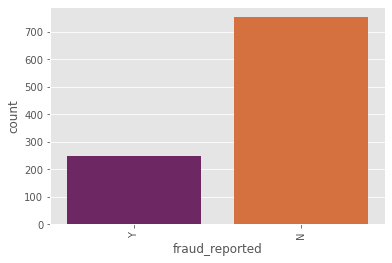

In [23]:
sns.countplot(df['fraud_reported'],palette='inferno',data=df);
plt.xticks(rotation=90)

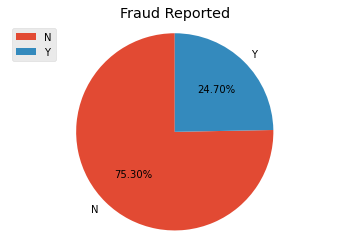

In [24]:
#  pie plot of fraud_reported 

labels = ['N', 'Y']
value = [753, 247] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'fraud_reported')
plt.style.use('ggplot')
plt.title('Fraud Reported')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### The above count plot gives me clear idea that out of every 4 cases 1 can be considered as fraud.
#### And Pie plot shows me ther are widely "Yes" Fraud Report with 75.30% and "No"  with 24.70% .

### policy_state

In [25]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

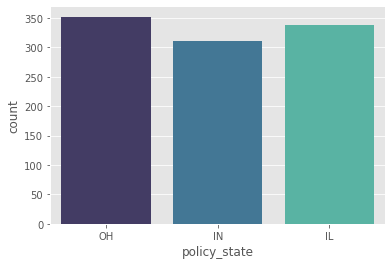

In [26]:
sns.countplot(df['policy_state'],palette='mako',data=df);

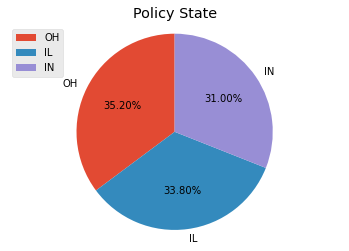

In [27]:
#  pie plot of policy_state 

labels = ['OH', 'IL', 'IN']
value = [352, 338, 310] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'policy_state')
plt.style.use('ggplot')
plt.title('Policy State')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### The above count plot gives me clear idea that out of every 4 cases 1 can be considered as fraud.
#### And Pie plot shows me ther are widely "Yes" Fraud Report with 75.30% and "No" with 24.70% .

### policy_csl

In [28]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

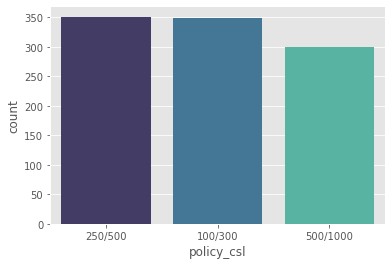

In [29]:
sns.countplot(df['policy_csl'],palette='mako',data=df);

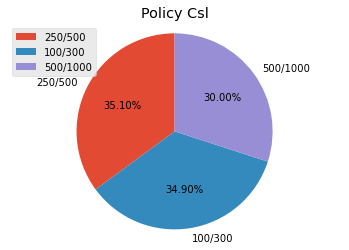

In [30]:
#  pie plot of policy_csl 

labels = ['250/500', '100/300', '500/1000']
value = [351, 349, 300] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'policy_csl')
plt.style.use('ggplot')
plt.title('Policy Csl')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### The above count plot & Pie Plot gives me clear idea that 250/500 policy csl giving higher 35.10% Percentage of Policy Csl.

### policy_deductable

In [31]:
df['policy_deductable'].value_counts()

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64

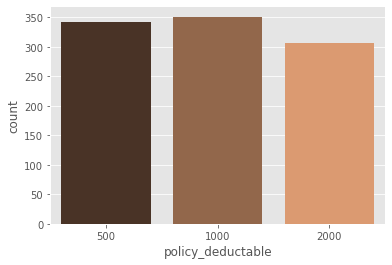

In [32]:
sns.countplot(df['policy_deductable'],palette='copper',data=df);

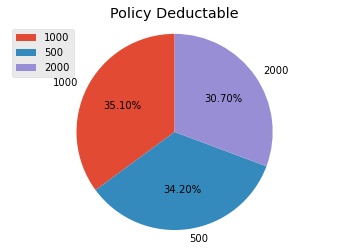

In [33]:
#  pie plot of policy_deductable 

labels = ['1000', '500', '2000']
value = [351, 342, 307] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'policy_deductable')
plt.style.use('ggplot')
plt.title('Policy Deductable')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### The above count plot & Pie Plot gives me clear idea that 1000 policy Deductable giving higher 35.10% Percentage of Policy Csl.

### insured_sex

In [34]:
df['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

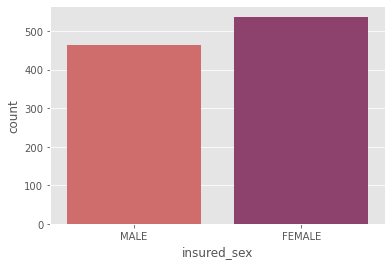

In [35]:
sns.countplot(df['insured_sex'],palette='flare',data=df);

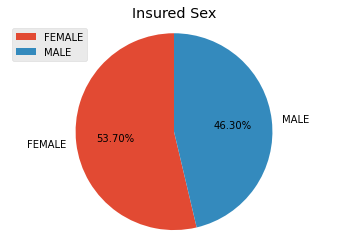

In [36]:
#  pie plot of insured_sex 

labels = ['FEMALE', 'MALE']
value = [537, 463] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_education_level')
plt.style.use('ggplot')
plt.title('Insured Sex')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper left')
plt.show()

#### Acording to the Insured_Sex column I see count plot & pie plot giving an idea of Female faces more fraud than male with 53.70%. 

### insured_education_level

In [37]:
df['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MD'),
  Text(1, 0, 'PhD'),
  Text(2, 0, 'Associate'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'High School'),
  Text(5, 0, 'College'),
  Text(6, 0, 'JD')])

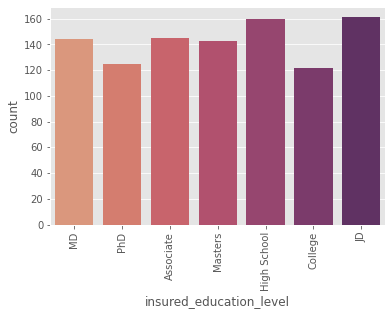

In [38]:
sns.countplot(df['insured_education_level'],palette='flare',data=df);
plt.xticks(rotation=90)

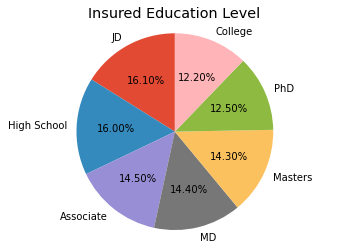

In [43]:
#  pie plot of insured_education_level

labels = ['JD', 'High School', 'Associate', 'MD', 'Masters','PhD','College']
value = [161, 160, 145, 144, 143, 125, 122] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_education_level')
plt.style.use('ggplot')
plt.title('Insured Education Level')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the insured_education_level column I see count plot & pie plot giving an idea of JD faces more fraud than others with 16.10%.

### insured_occupation

In [44]:
df['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

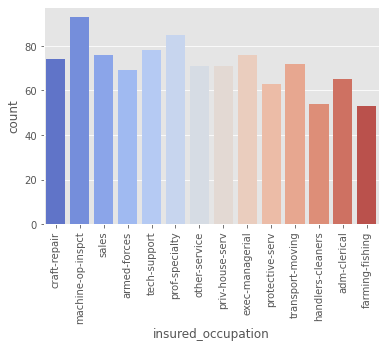

In [45]:
sns.countplot(df['insured_occupation'],palette='coolwarm',data=df);
plt.xticks(rotation=90)

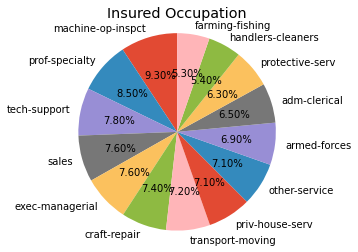

In [46]:
#  pie plot of insured_occupation 

labels = ['machine-op-inspct', 'prof-specialty', 'tech-support', 'sales', 'exec-managerial','craft-repair','transport-moving','priv-house-serv','other-service','armed-forces','adm-clerical','protective-serv','handlers-cleaners','farming-fishing']
value = [93, 85, 78, 76, 76, 74, 72, 71, 71, 69, 65, 63, 54, 53] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_occupation')
plt.style.use('ggplot')
plt.title('Insured Occupation')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.55)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Acording to the insured_occupation column I see count plot & pie plot giving an idea of machine-op-inspct faces more fraud than others with 9.30%.

## insured_hobbies

In [47]:
df['insured_hobbies'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
golf              55
movies            55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

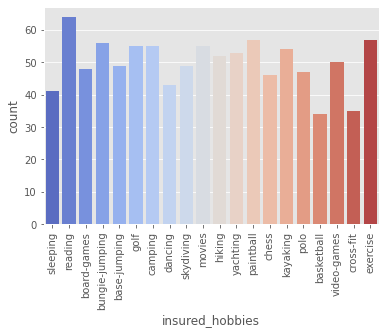

In [48]:
sns.countplot(df['insured_hobbies'],palette='coolwarm',data=df);
plt.xticks(rotation=90)

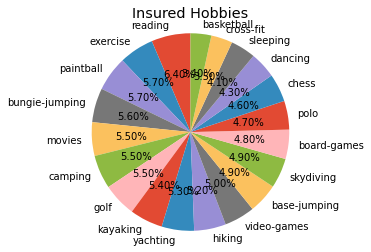

In [52]:
#  pie plot of insured_hobbies 

labels = ['reading', 'exercise', 'paintball', 'bungie-jumping', 'movies','camping','golf','kayaking','yachting','hiking','video-games','base-jumping','skydiving','board-games','polo','chess','dancing','sleeping','cross-fit','basketball']
value = [64, 57, 57, 56, 55, 55, 55, 54, 53, 52, 50, 49, 49, 48, 47, 46, 43, 41, 35, 34] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_hobbies')
plt.style.use('ggplot')
plt.title('Insured Hobbies')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Acording to the insured_hobbies column I see count plot & pie plot giving an idea of reading clients  faces more fraud than others with 6.40%.

## insured_relationship

In [53]:
df['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

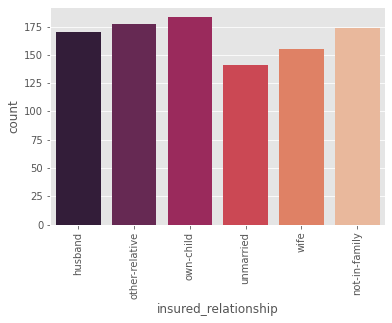

In [54]:
sns.countplot(df['insured_relationship'],palette='rocket',data=df);
plt.xticks(rotation=90)

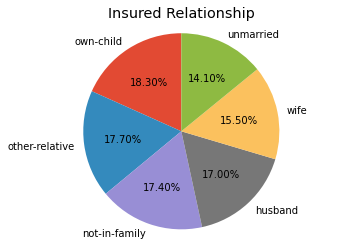

In [55]:
#  pie plot of insured_relationship 

labels = ['own-child', 'other-relative', 'not-in-family', 'husband', 'wife','unmarried']
value = [183, 177, 174, 170, 155, 141] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'insured_relationship')
plt.style.use('ggplot')
plt.title('Insured Relationship')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
b
plt.show()

#### Acording to the insured_hobbies column I see count plot & pie plot giving an idea of own_child faces more fraud report than others with 18.30%.

## incident_type

In [146]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

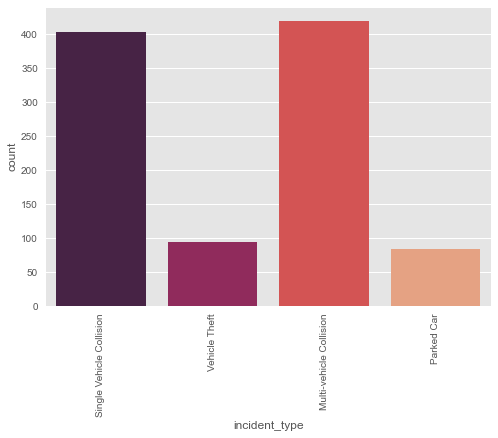

In [147]:
sns.countplot(df['incident_type'],palette='rocket',data=df);
plt.xticks(rotation=90)

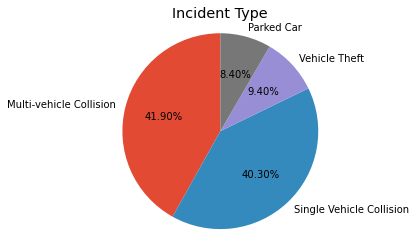

In [56]:
#  pie plot of incident_type 

labels = ['Multi-vehicle Collision', 'Single Vehicle Collision', 'Vehicle Theft', 'Parked Car']
value = [419, 403, 94, 84] # 
# plt.pie(x=vbalue, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_type')
plt.style.use('ggplot')
plt.title('Incident Type')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### Acording to the incident_type column I see count plot & pie plot giving an idea of Multi-vehicle Collision faces more fraud report than others with 41.90%.

## collision_type

In [57]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [58]:
# repalcing the values with mode
df['collision_type'] = df['collision_type'].str.replace('?','Rear Collision')

In [59]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

#### I have replace '?' column into 'Rear Collision' with mode method.

(array([0, 1, 2]),
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Rear Collision'),
  Text(2, 0, 'Front Collision')])

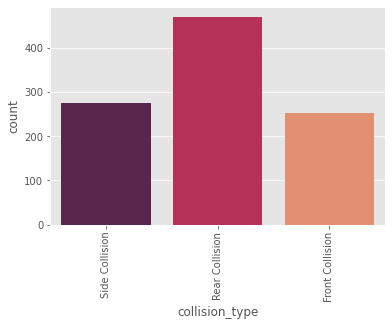

In [60]:
sns.countplot(df['collision_type'],palette='rocket',data=df);
plt.xticks(rotation=90)

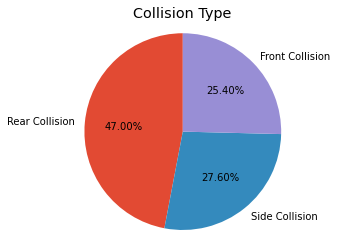

In [61]:
#  pie plot of collision_type 

labels = ['Rear Collision', 'Side Collision', 'Front Collision']
value = [470, 276, 254] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'collision_type')
plt.style.use('ggplot')
plt.title('Collision Type')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the collision_type column I see count plot & pie plot giving an idea of Rear Collision faces more fraud report than others with 47.00%

## incident_severity

In [151]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

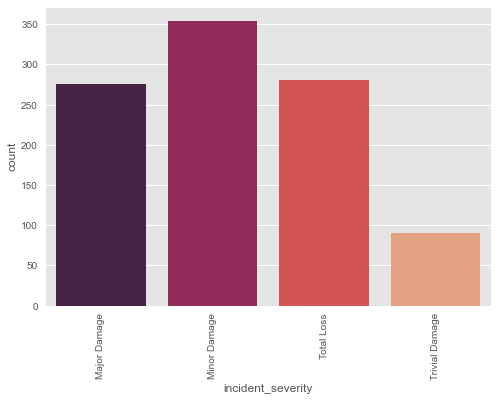

In [152]:
sns.countplot(df['incident_severity'],palette='rocket',data=df);
plt.xticks(rotation=90)

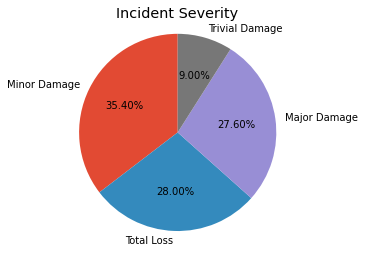

In [62]:
#  pie plot of incident_severity 

labels = ['Minor Damage', 'Total Loss', 'Major Damage','Trivial Damage']
value = [354, 280, 276, 90] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_severity')
plt.style.use('ggplot')
plt.title('Incident Severity')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the incident_severity column I see count plot & pie plot giving an idea of Minor Damage have more fraud report than others with 35.40%

## authorities_contacted

In [153]:
df['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

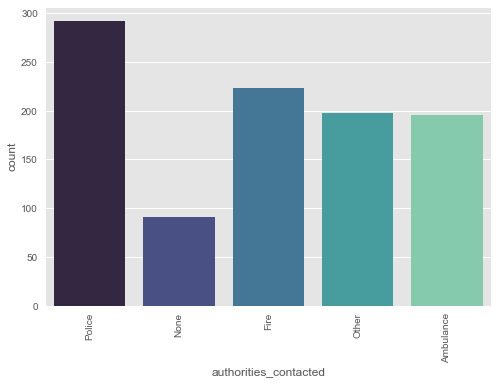

In [154]:
sns.countplot(df['authorities_contacted'],palette='mako',data=df);
plt.xticks(rotation=90)

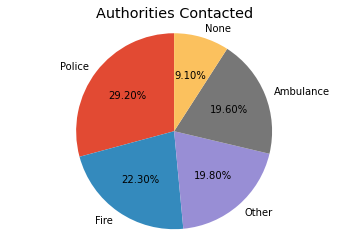

In [63]:
#  pie plot of authorities_contacted 

labels = ['Police', 'Fire', 'Other','Ambulance', 'None']
value = [292, 223, 198, 196, 91] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'authorities_contacted')
plt.style.use('ggplot')
plt.title('Authorities Contacted')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the authorities_contacted column I see count plot & pie plot giving an idea of Police have more fraud report than others with 29.20%

## incident_state

In [155]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

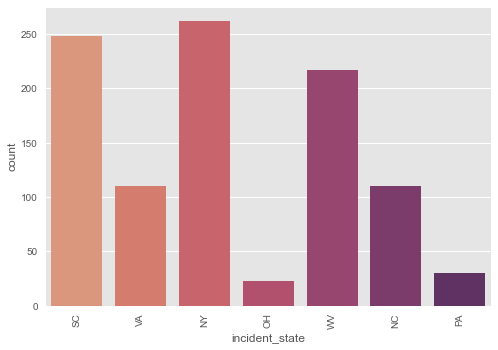

In [156]:
sns.countplot(df['incident_state'],palette='flare',data=df);
plt.xticks(rotation=90)

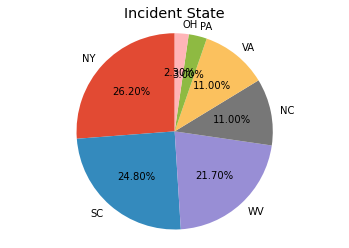

In [64]:
#  pie plot of incident_state 

labels = ['NY', 'SC', 'WV','NC', 'VA', 'PA', 'OH']
value = [262, 248, 217, 110, 110, 30, 23] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_state')
plt.style.use('ggplot')
plt.title('Incident State')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the incident_state column I see count plot & pie plot giving an idea of NY have more fraud report than others with 26.20%

## incident_city

In [157]:
df['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

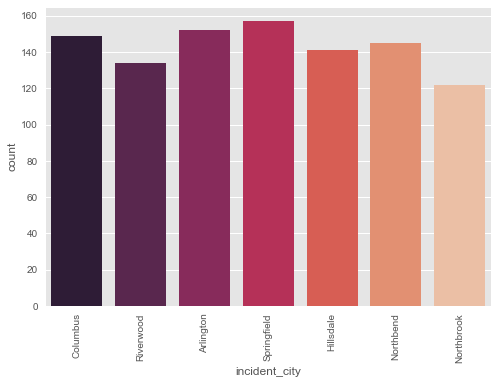

In [158]:
sns.countplot(df['incident_city'],palette='rocket',data=df);
plt.xticks(rotation=90)

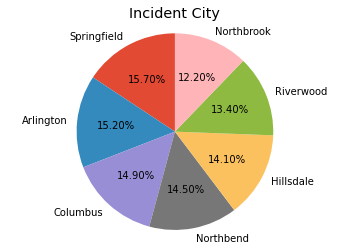

In [65]:
#  pie plot of incident_city 

labels = ['Springfield', 'Arlington', 'Columbus','Northbend', 'Hillsdale', 'Riverwood', 'Northbrook']
value = [157, 152, 149, 145, 141, 134, 122] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'incident_city')
plt.style.use('ggplot')
plt.title('Incident City')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the incident_city column I see count plot & pie plot giving an idea of Springfield have more fraud report than others with 15.70%

## number_of_vehicles_involved

In [159]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

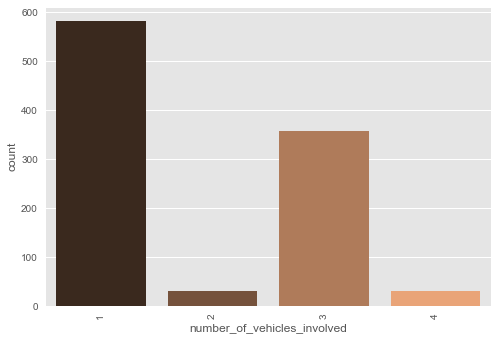

In [160]:
sns.countplot(df['number_of_vehicles_involved'],palette='copper',data=df);
plt.xticks(rotation=90)

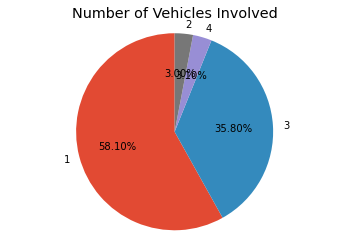

In [66]:
#  pie plot of number_of_vehicles_involved 

labels = ['1', '3', '4','2']
value = [581, 358, 31, 30] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'number_of_vehicles_involved')
plt.style.use('ggplot')
plt.title('Number of Vehicles Involved')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the number_of_vehicles_involved column I see count plot & pie plot giving an idea of 1 have more fraud report than others with 58.10%

## property_damage

In [68]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [69]:
# repalcing the values with mode
df['property_damage'] = df['property_damage'].str.replace('?','NO')

In [70]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

#### I have replace '?' column into 'property_damage' with mode method.

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

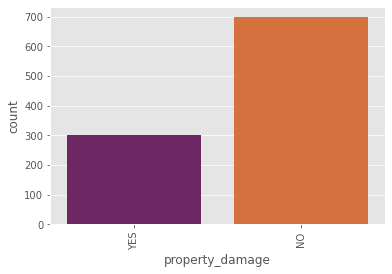

In [71]:
sns.countplot(df['property_damage'],palette='inferno',data=df);
plt.xticks(rotation=90)

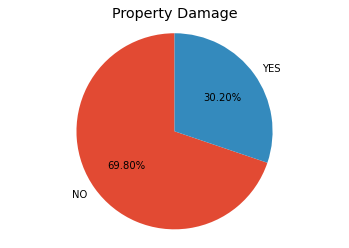

In [78]:
#  pie plot of property_damage 

labels = ['NO', 'YES']
value = [698, 302] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'property_damage')
plt.style.use('ggplot')
plt.title('Property Damage')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the property_damage column I see count plot & pie plot giving an idea of NO have more report than other with 69.80%

## witnesses

In [164]:
df['witnesses'].value_counts()

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

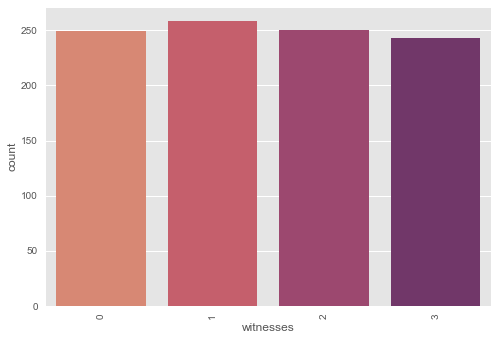

In [165]:
sns.countplot(df['witnesses'],palette='flare',data=df);
plt.xticks(rotation=90)

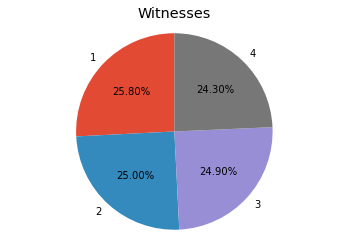

In [73]:
#  pie plot of witnesses 

labels = ['1', '2', '3', '4']
value = [258, 250, 249, 243] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'witnesses')
plt.style.use('ggplot')
plt.title('Witnesses')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the witnesses column I see count plot & pie plot giving an idea of 1 have more report than other with 25.80%

## police_report_available

In [74]:
df['police_report_available'].value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [75]:
# repalcing the values with mode
df['police_report_available'] = df['police_report_available'].str.replace('?','NO')

In [76]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

#### I have replace '?' column into 'police_report_available' with mode method.

(array([0, 1]), [Text(0, 0, 'YES'), Text(1, 0, 'NO')])

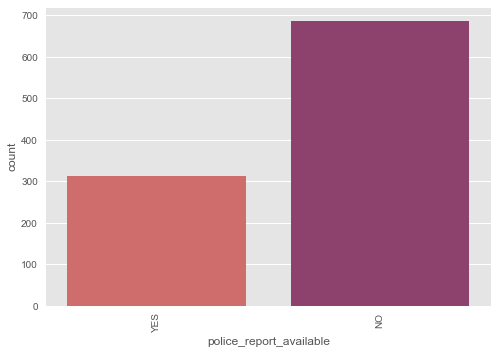

In [168]:
sns.countplot(df['police_report_available'],palette='flare',data=df);
plt.xticks(rotation=90)

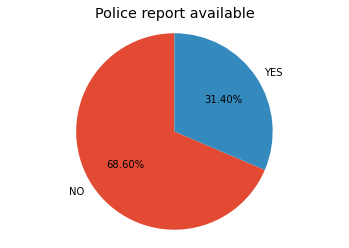

In [79]:
#  pie plot of police_report_available 

labels = ['NO', 'YES']
value = [686, 314] # 
# plt.pie(x=value, labels=labels, autopct='%.2f%%')

# explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e. 'police_report_available')
plt.style.use('ggplot')
plt.title('Police report available')
plt.pie(x=value, labels=labels, autopct='%.2f%%',
         startangle=90,radius=1.20)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Acording to the police_report_available column I see count plot & pie plot giving an idea of NO have more report than other with 68.60%

In [169]:
df.shape

(1000, 39)

#### After all visualization I found shape option to know about the dataset.

## Label Encoder

In [170]:
le = LabelEncoder()
df.policy_state = le.fit_transform(df.policy_state)
df.insured_sex = le.fit_transform(df.insured_sex)
df.insured_education_level = le.fit_transform(df.insured_education_level)
df.insured_occupation = le.fit_transform(df.insured_occupation)
df.insured_hobbies = le.fit_transform(df.insured_hobbies)
df.insured_relationship = le.fit_transform(df.insured_relationship)
df.incident_type = le.fit_transform(df.incident_type)
df.collision_type = le.fit_transform(df.collision_type)
df.incident_severity = le.fit_transform(df.incident_severity)
df.authorities_contacted = le.fit_transform(df.authorities_contacted)
df.incident_state = le.fit_transform(df.incident_state)
df.incident_city = le.fit_transform(df.incident_city)
df.incident_location = le.fit_transform(df.incident_location)
df.property_damage = le.fit_transform(df.property_damage)
df.police_report_available = le.fit_transform(df.police_report_available)
df.auto_make = le.fit_transform(df.auto_make)
df.auto_model = le.fit_transform(df.auto_model)
df.fraud_reported = le.fit_transform(df.fraud_reported)
df.policy_bind_date = le.fit_transform(df.policy_bind_date)
df.policy_csl = le.fit_transform(df.policy_csl)
df.incident_date = le.fit_transform(df.incident_date)

In [171]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [172]:
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


#### After Applying Label Encoder i have converted all the strings columns into integer.

#### From the describe code i can say that there are few zero values in this dataset which i will replace soon.

#### Now I can see that there are few outliers in the dataset which I will rectify with zscore.

## Distribution Plot

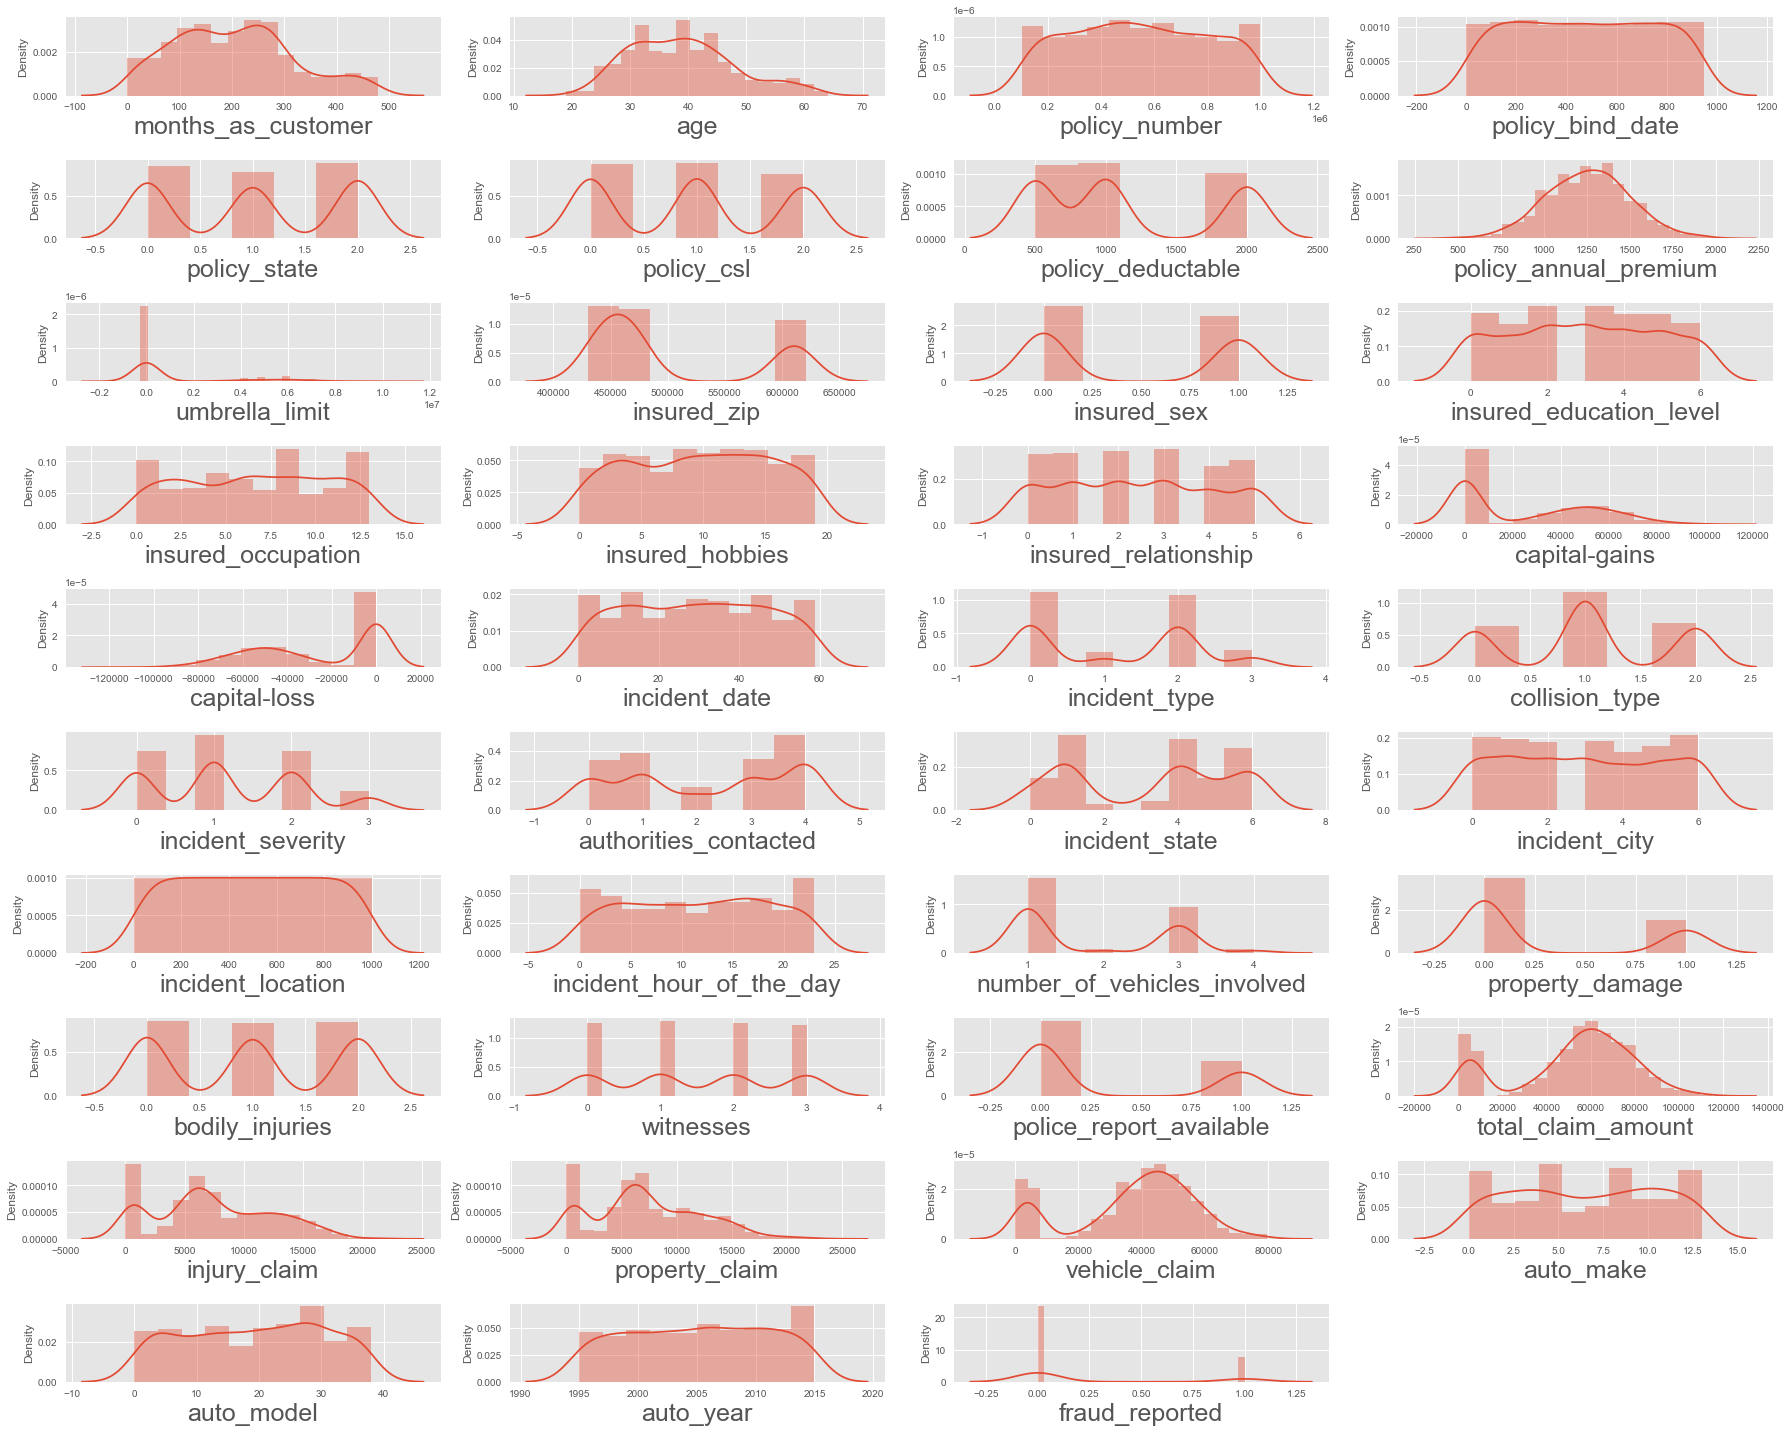

In [173]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=39:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### After replacing categorical columns to numerical values I use Distribution Plot to find the Skewness in this Dataset.

## Replacing the zero values from different columns

In [174]:
# Replacing categorial columns with mean
df['policy_bind_date']=df['policy_bind_date'].replace(0,df['policy_bind_date'].mean())

#### According to the Dataset these 8 columns (policy_bind_date) have zero values which i have replace it.

## Box Plot

months_as_customer                AxesSubplot(0.125,0.816017;0.168478x0.0639831)
age                            AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
policy_number                  AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
policy_bind_date               AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
policy_state                      AxesSubplot(0.125,0.739237;0.168478x0.0639831)
policy_csl                     AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
policy_deductable              AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
policy_annual_premium          AxesSubplot(0.731522,0.739237;0.168478x0.0639831)
umbrella_limit                    AxesSubplot(0.125,0.662458;0.168478x0.0639831)
insured_zip                    AxesSubplot(0.327174,0.662458;0.168478x0.0639831)
insured_sex                    AxesSubplot(0.529348,0.662458;0.168478x0.0639831)
insured_education_level        AxesSubplot(0.731522,0.662458;0.168478x0.0639831)
insured_occupation          

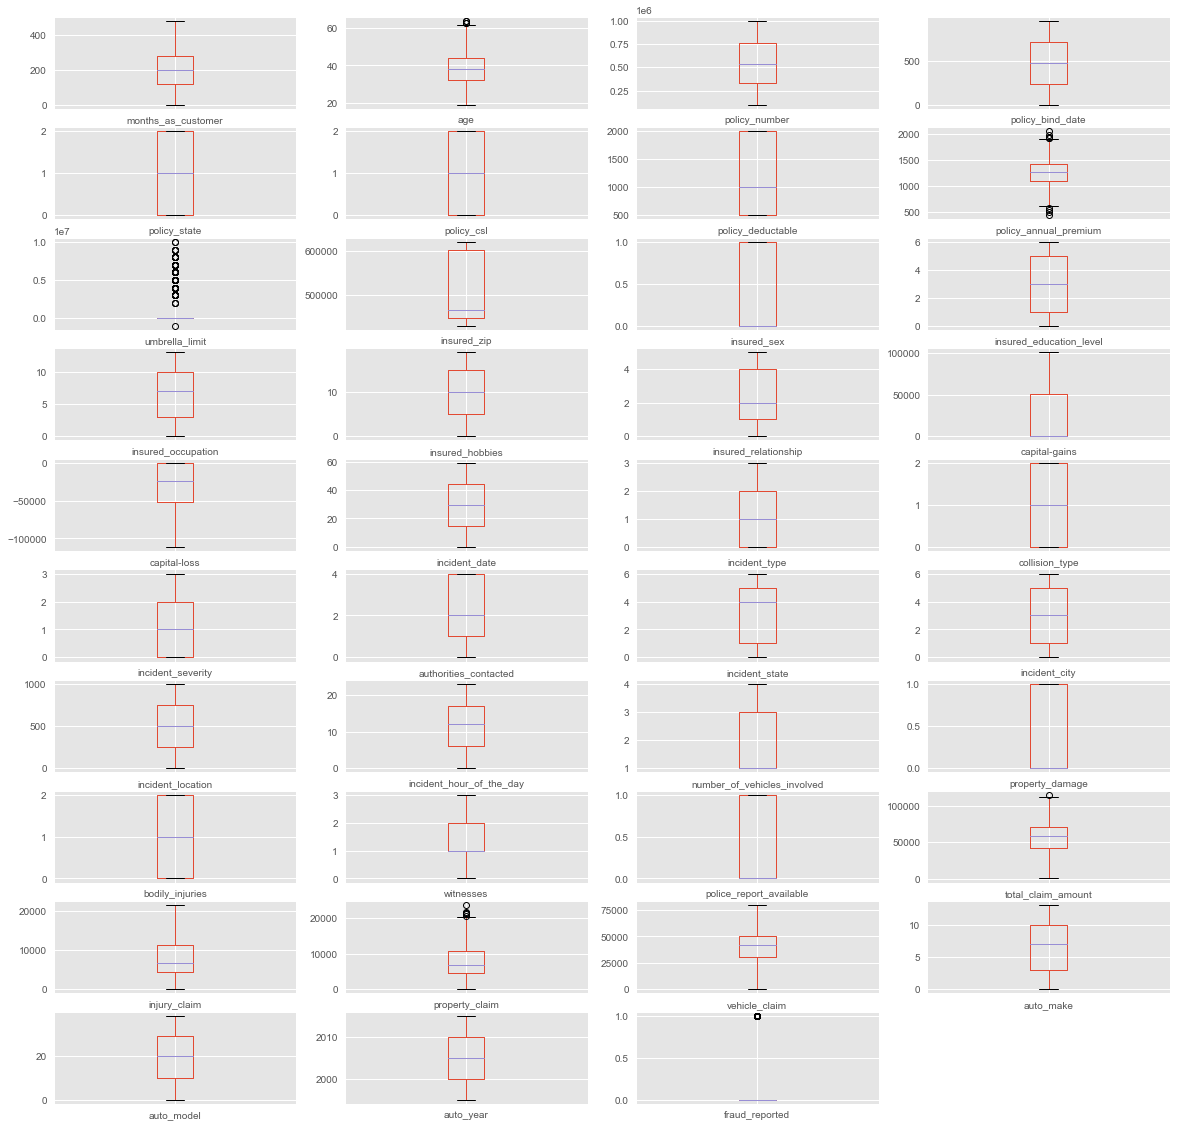

In [175]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(20,20))

## Z score

In [176]:
z_score = zscore(df[['age','policy_annual_premium','total_claim_amount','property_claim']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,9.960000e+02,996.000000,...,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,204.449799,38.980924,546514.416667,475.035137,1.015060,0.948795,1137.550201,1257.616446,1.105422e+06,500954.633534,...,1.481928,0.313253,52735.100402,7427.680723,7385.702811,37921.716867,6.545181,19.324297,2005.096386,0.246988
std,115.023399,9.140700,256858.784341,274.166991,0.830798,0.804753,612.397564,240.385312,2.300957e+06,71577.584889,...,1.110333,0.464049,26373.980757,4879.556218,4799.806634,18874.919904,4.032153,11.146275,6.015954,0.431476
min,0.000000,19.000000,100804.000000,1.000000,0.000000,0.000000,500.000000,538.170000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,116.000000,32.000000,336472.250000,235.750000,0.000000,0.000000,500.000000,1090.567500,0.000000e+00,448404.500000,...,0.750000,0.000000,41812.500000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,200.000000,38.000000,533940.500000,474.166000,1.000000,1.000000,1000.000000,1257.595000,0.000000e+00,466391.500000,...,1.000000,0.000000,57935.000000,6770.000000,6745.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,277.000000,44.250000,759099.750000,711.250000,2.000000,2.000000,2000.000000,1415.695000,0.000000e+00,603141.000000,...,2.000000,1.000000,70530.000000,11285.000000,10865.000000,50762.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.000000,2.000000,2000.000000,1969.630000,1.000000e+07,620962.000000,...,3.000000,1.000000,114920.000000,21450.000000,21810.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


#### From above image we can clear see that there are number of black dots in most of the column which are referring to the outliers, so it means most of the data are outside the distribution.

#### So now we detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers i have used z score above to remove outliers.

## After Removing Skewness & outliers  using Distribution Plot

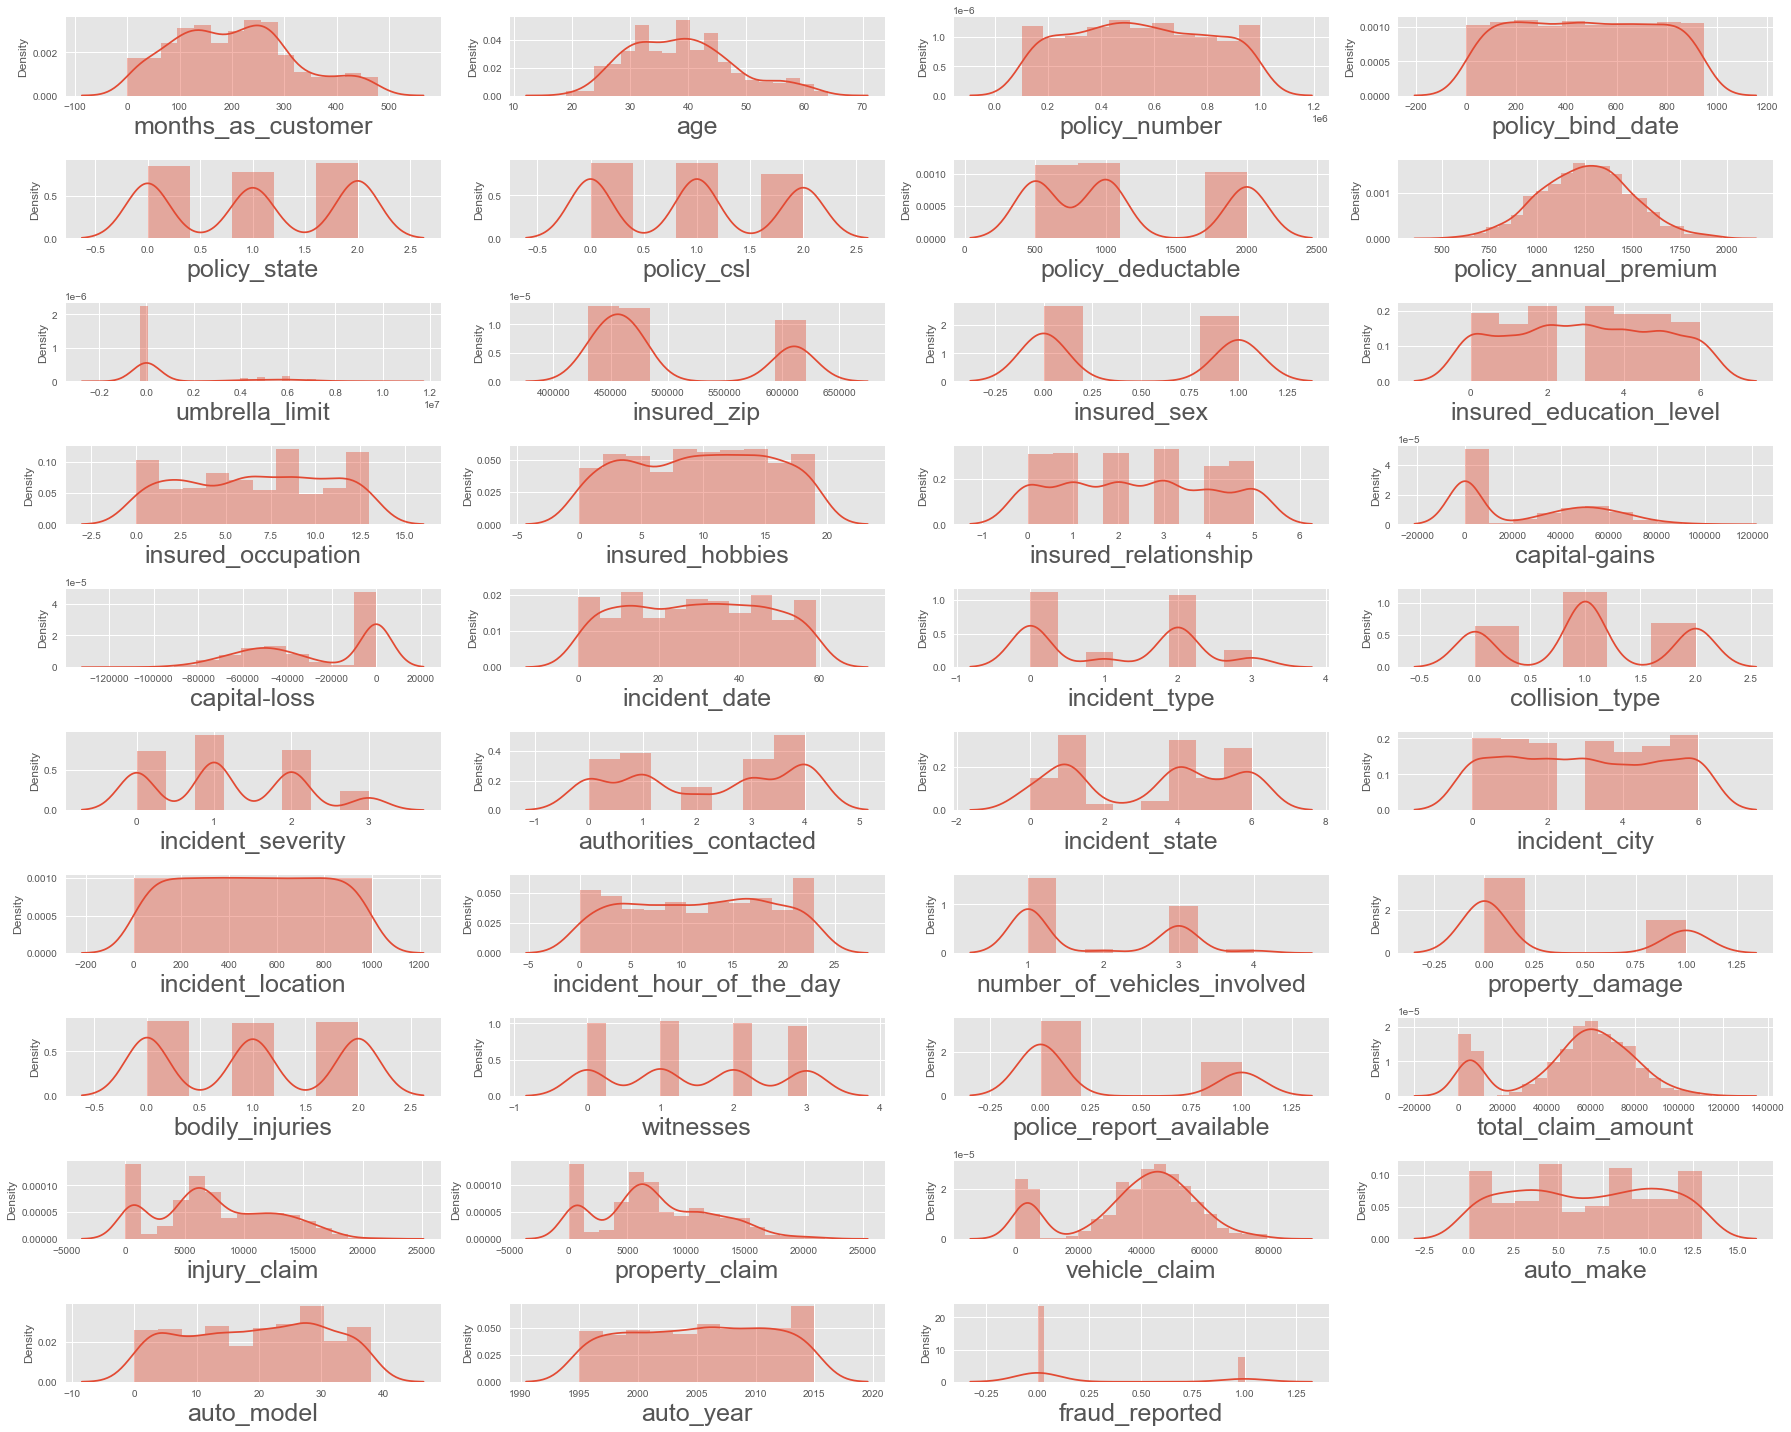

In [177]:
# checking distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=39:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

In [178]:
df.shape

(996, 39)

#### After Removing Outliers & Skewness I make Distribution Plot to understand how much my data is ready for Model Prediction.

## Visualize the correlation

In [179]:
# find correlation of features vs target using corrwith

df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported)

months_as_customer             0.020966
age                            0.012408
policy_number                 -0.034174
policy_bind_date               0.057435
policy_state                   0.028864
policy_csl                    -0.038795
policy_deductable              0.015833
policy_annual_premium         -0.010174
umbrella_limit                 0.058781
insured_zip                    0.018075
insured_sex                    0.032173
insured_education_level        0.011520
insured_occupation             0.003335
insured_hobbies               -0.047983
insured_relationship           0.017992
capital-gains                 -0.018919
capital-loss                  -0.012552
incident_date                 -0.052056
incident_type                 -0.047850
collision_type                -0.014184
incident_severity             -0.405287
authorities_contacted         -0.043676
incident_state                -0.051534
incident_city                 -0.038545
incident_location             -0.005656


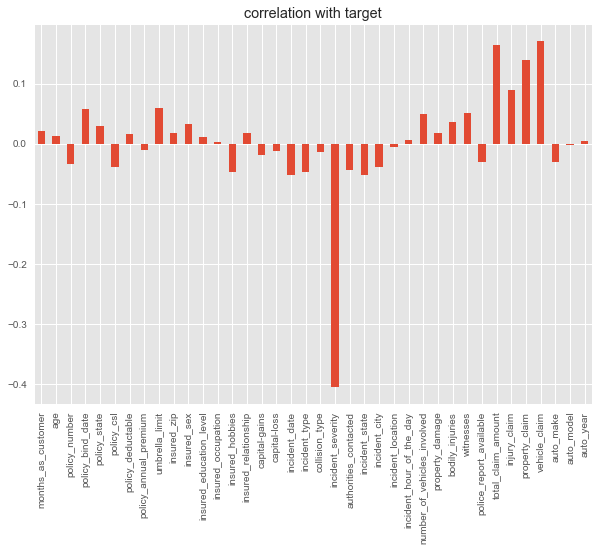

In [180]:
df.drop('fraud_reported',axis=1).corrwith(df.fraud_reported).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### Using corrwith to find the correlation relationship of features vs label which shows incedent_security column Having more Negative values and remaining columns are having a relation with other columns.

## Machine Learning

In [181]:
# dividing features and label

x = df.drop('fraud_reported',axis=1)
y = df.fraud_reported

#### Separate response variable and features in x & y.

## StandardScaler

#### The scikit library provides various types of scalers including MinMax Scaler and the StandardScaler.

#### Below I will use the StandardScaler to scale the data.

In [182]:
# standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.07467064,  0.98718995, -0.09710371, ...,  0.85724795,
        -1.64480984, -0.18233788],
       [ 0.20484556,  0.33045533, -0.79323246, ...,  0.36098584,
        -0.65743728,  0.31658665],
       [-0.61279003, -1.0924697 ,  0.54993063, ..., -0.63153838,
         0.95826328,  0.31658665],
       ...,
       [-0.64758303, -0.54519084,  1.44900036, ...,  1.105379  ,
        -0.02910929, -1.5128033 ],
       [ 2.20544326,  2.51957075, -0.04897918, ..., -1.37593154,
        -1.28576528, -1.18018695],
       [ 2.18804676,  2.30065921,  0.03725934, ...,  0.36098584,
        -0.65743728,  0.31658665]])

#### By Using Standard Scaler I have scaled the data in scaled one.

## VIF - variance inflation factor

In [183]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,6.833326,months_as_customer
1,6.848315,age
2,1.030116,policy_number
3,1.027389,policy_bind_date
4,1.038405,policy_state
5,1.032927,policy_csl
6,1.039105,policy_deductable
7,1.040646,policy_annual_premium
8,1.032321,umbrella_limit
9,1.030804,insured_zip


#### By using Variance Inflation Factor(VIF) I can see that there is a no strong relationship among any Features as values are less than 5 which shows there is no multi-collinearity.

## Model Building

#### Splitting the dataset into the Training set and Test set.

#### The data should be divided into train and test data.

#### I will use train_test_split feature to divide the data and I will be using testing set of 25% and a training set of 75% of the data.

#### I can set the random state of the split to ensure consistent results.

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

### Applying Machine Learning Algorithms

#### Since I must predict a binary class, I will be using classification models for training & predicting fraud_reported.

#### I need to keep in mind that my focus should be to have a better accuracy of predicting fraud_reported i.e. fraud_reported = 1 which in confusion matrix will be "True Positive".

#### However, I should not forget the prediction accuracy of not qualifying for fraud_reported i.e. fraud_reported = 0 which will be "True Negative" in confusion matrix.

#### In this section; Logistic Regression, Decision Tree Classification, Random Forest Classification and K-NN Classification are applied in the dataset.

#### I will apply these algorithms into all features available and I will also try to improve model accuracy via hyperparameter tuning.

## Logistic Regression

#### As here I wan’t to classify between the customers who have stayed in the company & how many have churned out, so I have used Logistic Regression.
#### Here is the code for Logistic Regression

In [246]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [247]:
y_pred = log_reg.predict(x_test)

In [248]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[177,  13],
       [ 38,  21]], dtype=int64)

In [249]:
log_reg.score(x_test,y_test)

0.7951807228915663

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       190
           1       0.62      0.36      0.45        59

    accuracy                           0.80       249
   macro avg       0.72      0.64      0.66       249
weighted avg       0.77      0.80      0.77       249



Text(0.5, 1.0, 'Logistic Regression')

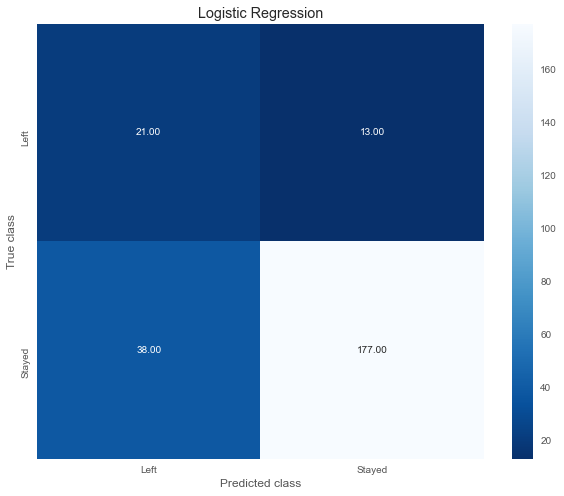

In [251]:
# Finding classification report
print(classification_report(y_test, y_pred))

# finding  confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### By using Logistic Regression I Get Accuracy Score : 80%.

#### After modelling Logistic Regression then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [191]:
# Logistic Regression AUC score
roc_auc_score(y_test,log_reg.predict(x_test))

0.6437555753791258

#### So, I get Auc Score From Logistic Regresion is 64.37%.

## KNN

### After using Logistic Regression I use Knn Model to predict the fraud_reported.
#### Therefore my first work is to use best feature method selection method which I will use with KNN model.

## Using SelectKBest Method for best features selection

In [192]:
best_features = SelectKBest(score_func=f_classif,k=32)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)

# concatenate Dataframe
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['Features_Name','Score']
print(feature_scores.nlargest(32,'Score'))

                  Features_Name       Score
20            incident_severity  195.361320
34                vehicle_claim   29.793150
31           total_claim_amount   27.451602
33               property_claim   19.460535
32                 injury_claim    8.099000
8                umbrella_limit    3.446357
3              policy_bind_date    3.289805
17                incident_date    2.700925
22               incident_state    2.646854
29                    witnesses    2.621027
26  number_of_vehicles_involved    2.354487
13              insured_hobbies    2.293819
18                incident_type    2.281139
21        authorities_contacted    1.899728
5                    policy_csl    1.498303
23                incident_city    1.479034
28              bodily_injuries    1.253161
2                 policy_number    1.162229
10                  insured_sex    1.029938
35                    auto_make    0.972307
30      police_report_available    0.920619
4                  policy_state 

#### Accordin to my prediction incident_severity is the best column of Automobile Insurance Fraud Dataset. 

### KNN model Building

In [252]:
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [253]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[179,  11],
       [ 50,   9]], dtype=int64)

In [254]:
knn.score(x_test,y_test)

0.7550200803212851

In [255]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       190
           1       0.45      0.15      0.23        59

    accuracy                           0.76       249
   macro avg       0.62      0.55      0.54       249
weighted avg       0.70      0.76      0.71       249



### According to my perception of modelling KNN I got Accuracy Score : 76%.
#### But this score can improve the accuracy by using Grid Search CV

## Let use Grid search CV for the best parameter to improve the accuracy

In [256]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[15,18],
             'n_neighbors':[3,5,7]
             }

In [257]:
gridsearch = GridSearchCV(estimator=knn,param_grid=param_grid)

In [258]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18], 'n_neighbors': [3, 5, 7]})

In [259]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 7}

In [260]:
# we will use the best parameters in our knn algorithm and check if accuracy is increasing.
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 15, n_neighbors=7)

In [261]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=15, n_neighbors=7)

In [262]:
y_pred = knn.predict(x_test)

In [263]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[181,   9],
       [ 54,   5]], dtype=int64)

In [264]:
knn.score(x_test,y_test)

0.7469879518072289

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       190
           1       0.36      0.08      0.14        59

    accuracy                           0.75       249
   macro avg       0.56      0.52      0.49       249
weighted avg       0.67      0.75      0.68       249



Text(0.5, 1.0, 'KNeighborsClassifier')

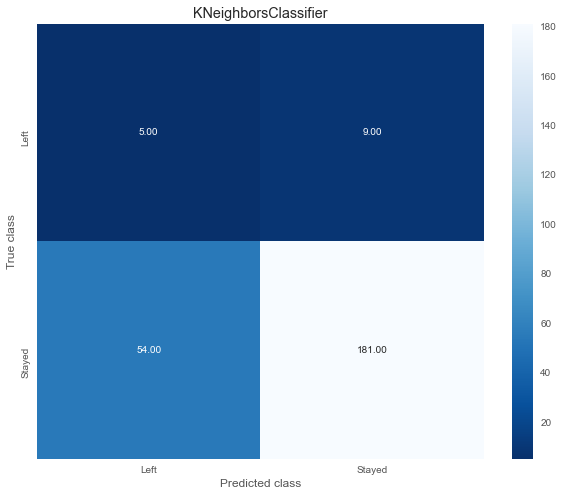

In [265]:
# Finding classification report of knn
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('KNeighborsClassifier')

### By using Grid Search CV I improve the Accuracy Score : 75%.

#### After modelling KNN then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [266]:
# KNN AUC score
roc_auc_score(y_test,knn.predict(x_test))

0.5186886708296163

#### So, I get Auc Score From KNN is 51.86%

## RandomForestClassifier

#### After using KNN I use RandomForestClassifier to predict the fraud_reported.

In [296]:
rfc = RandomForestClassifier()

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [297]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[174,  16],
       [ 37,  22]], dtype=int64)

In [298]:
rfc.score(x_test,y_test)

0.7871485943775101

In [299]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       190
           1       0.58      0.37      0.45        59

    accuracy                           0.79       249
   macro avg       0.70      0.64      0.66       249
weighted avg       0.77      0.79      0.77       249



### According to my perception of modelling RandomForestClassifier I got Accuracy Score : 77%.
#### But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [300]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]
         }

grd = GridSearchCV(rfc,param_grid=params)
grd.fit(x_train,y_train)
print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [301]:
rfc = grd.best_estimator_

In [302]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [303]:
y_pred = rfc.predict(x_test)

In [304]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[174,  16],
       [ 34,  25]], dtype=int64)

In [305]:
rfc.score(x_test,y_test)

0.7991967871485943

              precision    recall  f1-score   support

           0       0.84      0.92      0.87       190
           1       0.61      0.42      0.50        59

    accuracy                           0.80       249
   macro avg       0.72      0.67      0.69       249
weighted avg       0.78      0.80      0.79       249



Text(0.5, 1.0, 'RandomForestClassifier')

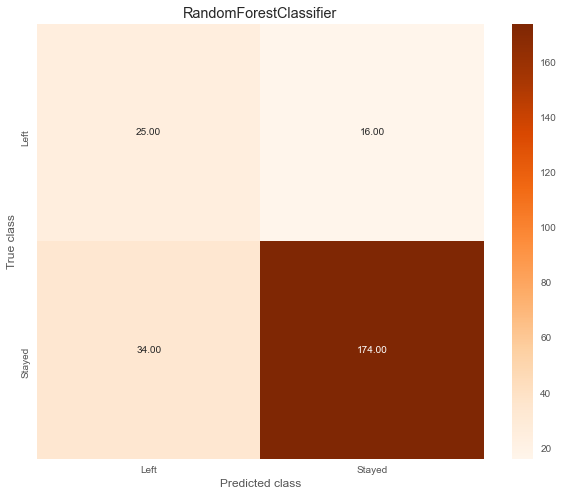

In [306]:
# Finding classification report of RandomForestClassifier
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap ="Oranges")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RandomForestClassifier')

### By using Grid Search CV I improve the Accuracy Score : 80%.

#### After modelling RandomForestClassifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [307]:
# Random forest  
roc_auc_score(y_test,rfc.predict(x_test))

0.6697591436217663

#### So, I get Auc Score From KNN is 66.97%

## Decision Tree Classifier

#### After using Random Forest Classifier I use Decision Tree Classifier to predict the fraud_reported.

In [279]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred = dtc.predict(x_test)

In [280]:
y_pred = log_reg.predict(x_test)

In [281]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[177,  13],
       [ 38,  21]], dtype=int64)

In [282]:
dtc.score(x_test,y_test)

0.7630522088353414

In [283]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       190
           1       0.62      0.36      0.45        59

    accuracy                           0.80       249
   macro avg       0.72      0.64      0.66       249
weighted avg       0.77      0.80      0.77       249



#### According to my perception of modelling Decision Tree Classifier I got Accuracy Score : 80%.

#### But this score can improve the accuracy by using Grid Search CV.

### Let use Grid search CV for the best parameter to improve the accuracy

In [284]:
grid_param = {'criterion':['gini','entropy'],
             'max_depth':range(2,10,3),
             'min_samples_leaf':range(1,10,2),
             'min_samples_split':range(2,10,2)
             }

In [285]:
grid_search = GridSearchCV(estimator=dtc,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs=1)

In [286]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [287]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 9, 'min_samples_split': 8}


In [288]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=9,min_samples_split=6)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=6)

In [289]:
y_pred = dtc.predict(x_test)

In [290]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[167,  23],
       [ 21,  38]], dtype=int64)

In [291]:
dtc.score(x_test,y_test)

0.8232931726907631

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       190
           1       0.62      0.64      0.63        59

    accuracy                           0.82       249
   macro avg       0.76      0.76      0.76       249
weighted avg       0.83      0.82      0.82       249



Text(0.5, 1.0, 'DecisionTreeClassifier')

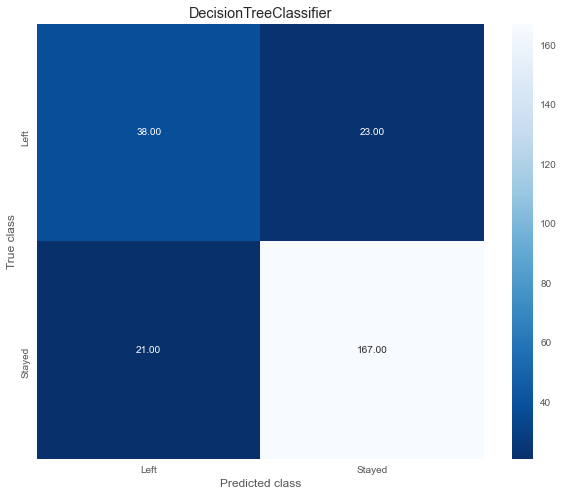

In [292]:
# Finding classification report of DecisionTreeClassifier
print(classification_report(y_test, y_pred))

# finding confusion matrix
cfm = metrics.confusion_matrix(y_pred, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(cfm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('DecisionTreeClassifier')

### By using Grid Search CV I improve the Accuracy Score : 82%.

#### After modelling Decision Tree Classifier then my next step is to find Auc Score which will help me to make Roc_Auc Curve.
#### Below is the Auc Score:

In [293]:
# Decision Tree Classifier AUC score
roc_auc_score(y_test,dtc.predict(x_test))

0.761507582515611

#### So, I get Auc Score From Decision Tree Classifier is 76.15%.

## Roc_Auc Curve

#### In Machine Learning, performance measurement is an essential task.
#### So when it comes to a classification problem, I can count on an AUC - ROC Curve.

#### It is one of the most important evaluation metrics for checking any classification model’s performance.

#### It is also written as AUROC (Area Under the Receiver Operating Characteristics).

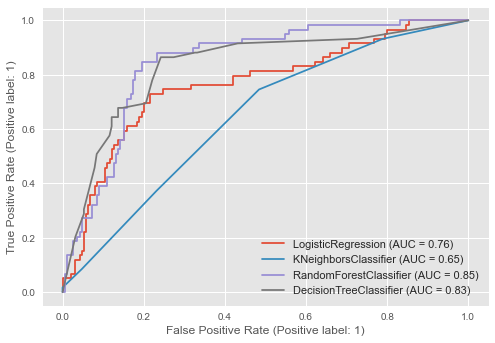

In [294]:
disp = plot_roc_curve(log_reg,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

## Summary

#### ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
#### ROC curves are appropriate when the observations are balanced or not.
#### According to my Roc_Auc Curve I can say that RandomForestClassifier with 85% is the best predictive model in this Dataset.


## Saving the Best Model

In [185]:
import pickle

In [308]:
# saving the Random Forest Classifier Model

filename = 'finalized_model.pickle'
pickle.dump(rfc,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

In [309]:
from IPython.display import Image
Image(url= "https://i.ytimg.com/vi/D_2LkhMJcfY/mqdefault.jpg")

### Saving Random Forest Classifier Model as it accuracy score is 80% and Roc_Auc Curve value is 85%.

## Conclusion

### In the modeling Building section, I have seen the hyperparameter tuned Random Forest Classifier Model has the highest Best Score (0.80).
### It can be clearly seen the feature engineering effects on each individual four models in 'Comparison of ML Classifiers with Effects of Future Engineering' Roc Curve chart above.
### I’ll briefly discuss how I approached this problem of predicting fraud_reported.

#### a) I have fraud_reported datastet from which I had to extract information.
#### b ) I had used pandas library to read the Dataset which provide me to explore & viualize the Data properly based on Rows & Columns.
#### c) After from all datasets, I preprocessed the data using replacing all zeros.
#### d) I did exploratory data analysis on main data frame and tried to see all visualizations.
#### e) Based on visulization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot to remove ouliers.
#### f) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### g) After from all these i split the Features & Labels into 2 parts.
#### h) On this data, I have applied our machine learning models such as logistic regression, Random forest,KNN and Decision Tree.
#### i) After which I found Random Forest Classifier Model has the High accuracy score(80%) and best amng all the models.
#### j)Based on the model scores, to predict fraud_reported,Random Forest Classifier Model seems to be the best model for this dataset.